In [1]:
import sys
sys.path.append('../src')

from time_series import (
    load_data,
    generate_lags,
    generate_lagged_df,
    split_df,
    fit_model,
    predict_evaluate_model,
    plot_forecast_vs_actual,
    plot_train_test_predictions,
    evaluate_methodology,
)


In [2]:
df = load_data('../data/data_original_m6.csv')
df.head(3)

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,125.672005,341.526031,81.144257,144.980698,116.244766,135.845093,295.972290,151.193497,225.756577,198.813828,...,73.001434,62.652004,37.921776,98.328560,159.164963,71.541222,63.674873,126.980408,182.482285,73.886658
2022-02-02,127.158058,347.372375,82.549454,146.648575,116.419128,137.952209,300.881073,150.612503,232.359009,193.332672,...,74.459702,62.853901,38.180336,99.012138,160.458786,72.398964,64.616043,128.688538,181.393707,73.694695
2022-02-03,129.093597,333.920837,82.834190,145.507904,112.476517,133.787003,292.273804,138.845505,231.047760,186.040558,...,69.478104,62.257393,37.758987,97.433182,155.803101,72.417839,64.327171,128.138443,175.842789,72.835434


In [12]:
# Parameters
stock = df['ABBV']
n_lags_future = 4
train_test_ratio = 0.8

# Generate lags
lags_past, lags_future, lags_ar, lags_arp = generate_lags(n_lags_past=2*n_lags_future,
                                                          n_lags_future=n_lags_future
                                                          )

# Generate lagged df
df_lagged = generate_lagged_df(
    series=stock,
    n_lags_past=2*n_lags_future,
    n_lags_future=n_lags_future,
)

# Split df
df_train, df_test = split_df(df_lagged,
                             train_test_ratio=train_test_ratio)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

from sklearn.linear_model import LinearRegression

# Evaluate AR
y_pred_train_ar, y_pred_test_ar, mape_train_ar, mape_test_ar = evaluate_methodology(
    df_train=df_train,
    df_test=df_test,
    features_train=lags_ar,
    features_test=lags_ar,
    model_class=LinearRegression
)

print(f"MAPE train (AR): {mape_train_ar:.6f}")
print(f"MAPE test (AR): {mape_test_ar:.6f}")

# Evaluate ARP
y_pred_train_arp, y_pred_test_arp, mape_train_arp, mape_test_arp  = evaluate_methodology(
    df_train=df_train,
    df_test=df_test,
    features_train=lags_arp,
    features_test=lags_arp[:len(lags_past) // 2]+['y-1']*n_lags_future,
    model_class=LinearRegression
)

print(f"MAPE train (ARP): {mape_train_arp:.6f}")
print(f"MAPE test (ARP): {mape_test_arp:.6f}")


MAPE train (AR): 0.011313
MAPE test (AR): 0.008982
MAPE train (ARP): 0.007984
MAPE test (ARP): 0.009086


In [13]:
lags_arp

['y-4', 'y-3', 'y-2', 'y-1', 'y+1', 'y+2', 'y+3', 'y+4']

In [14]:
lags_arp[:len(lags_past) // 2]+['y-1']*n_lags_future

['y-4', 'y-3', 'y-2', 'y-1', 'y-1', 'y-1', 'y-1', 'y-1']

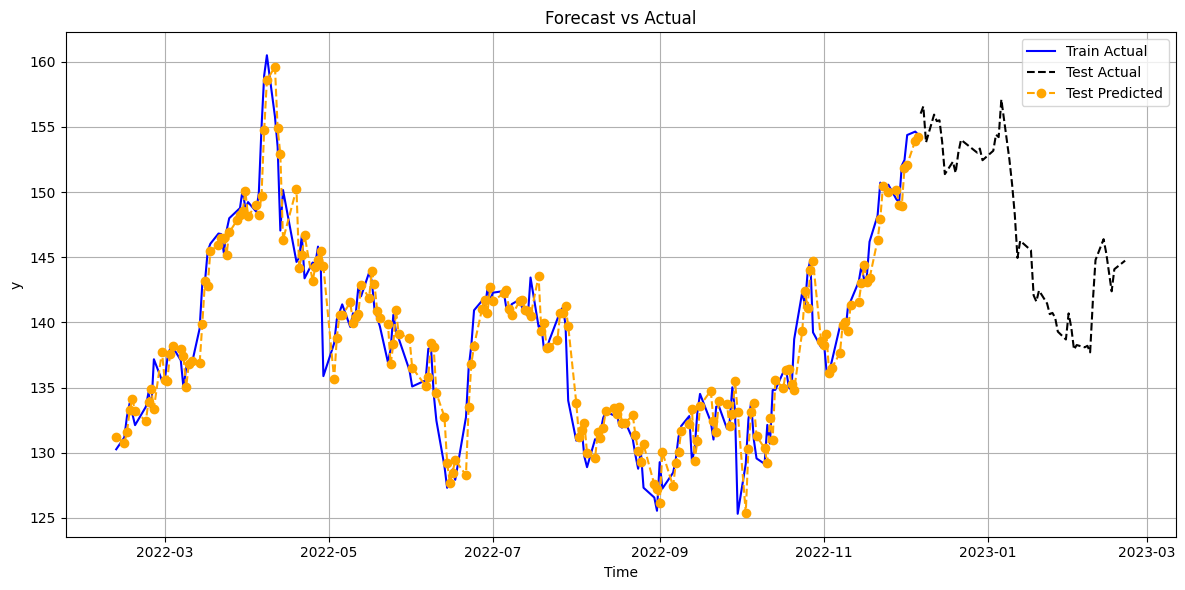

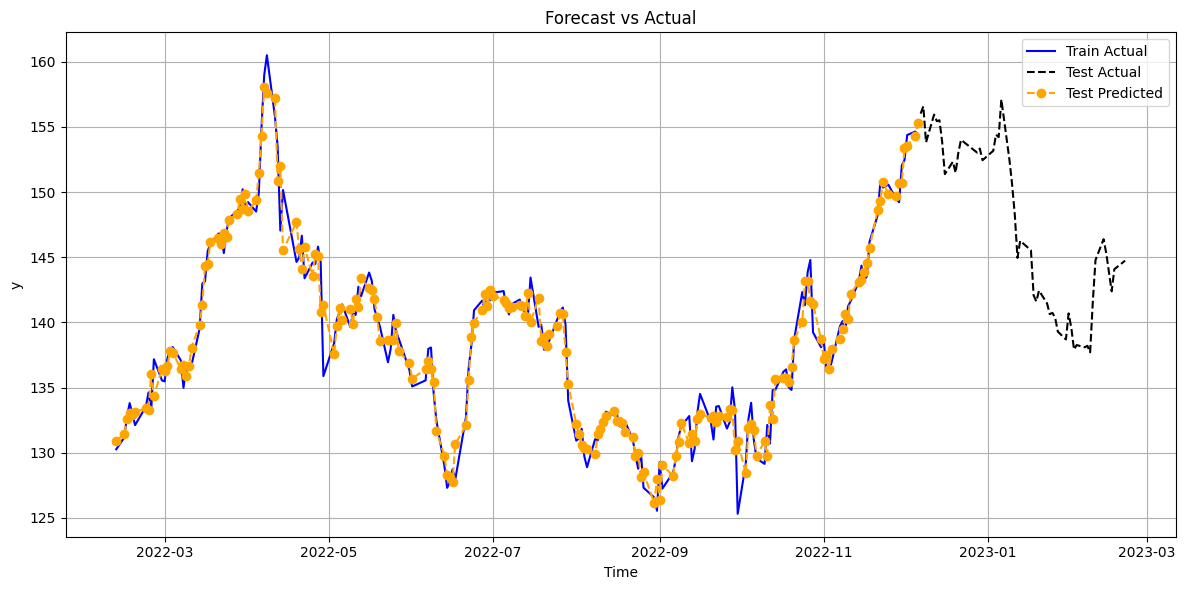

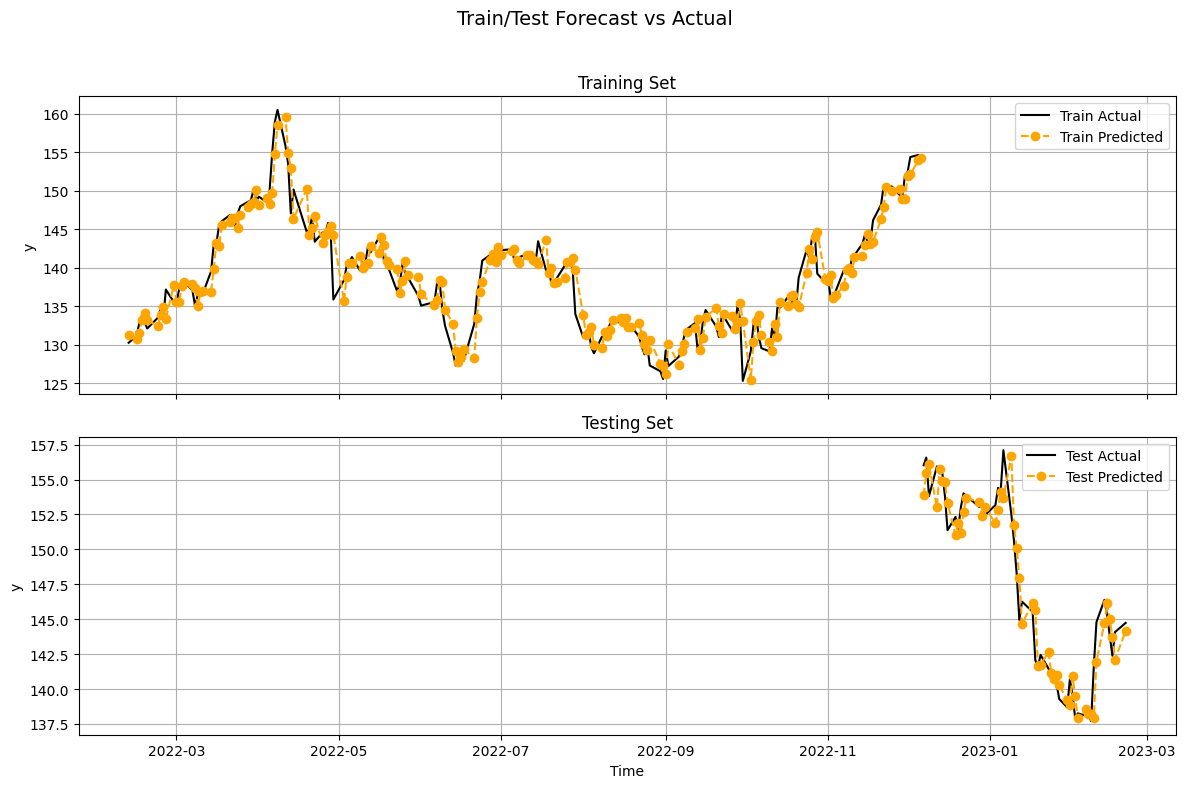

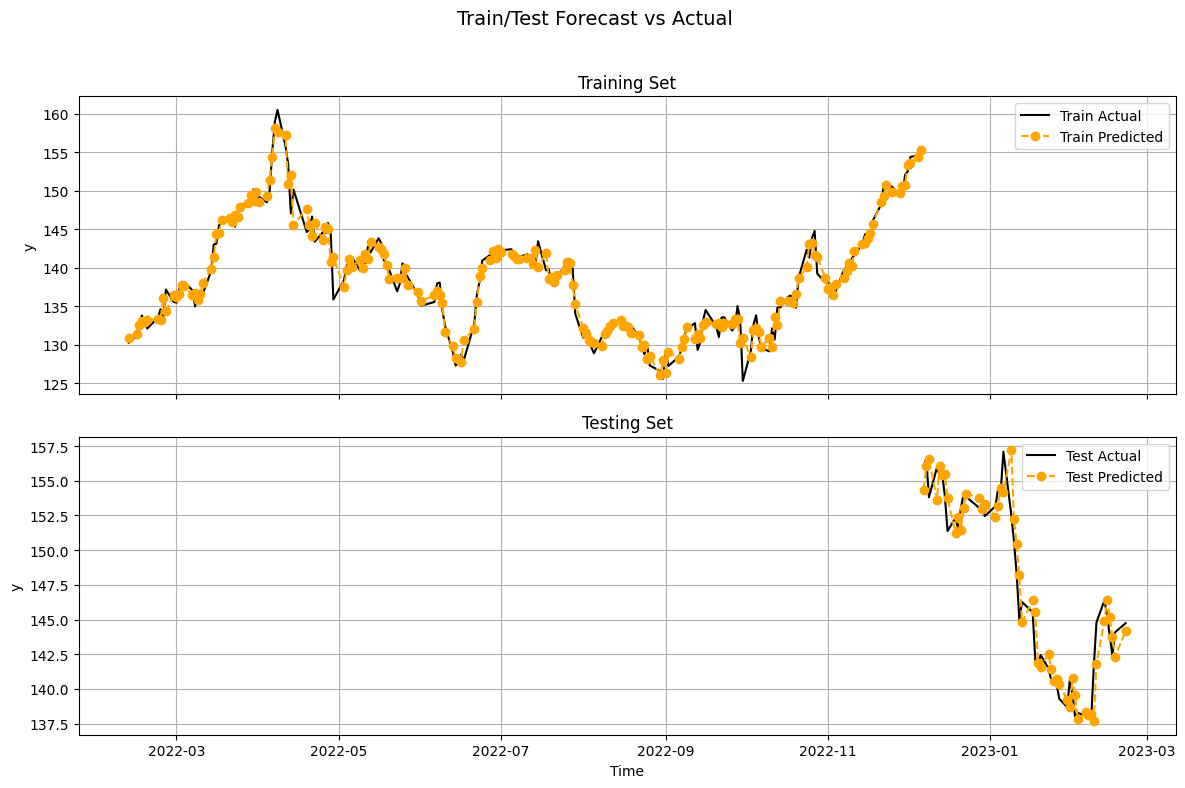

In [15]:
# Plots
plot_forecast_vs_actual(df_train, df_test, y_pred_train_ar)
plot_forecast_vs_actual(df_train, df_test, y_pred_train_arp)
plot_train_test_predictions(df_train, df_test, y_pred_train_ar, y_pred_test_ar)
plot_train_test_predictions(df_train, df_test, y_pred_train_arp, y_pred_test_arp)
